In [6]:
import nltk
sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"), 
("dog", "NN"), ("barked", "VBD"), ("at", "IN"),  ("the", "DT"), ("cat", "NN")]


In [7]:
grammar = "NP: {<DT>?<JJ>*<NN>}" 

In [8]:
cp = nltk.RegexpParser(grammar) 
result = cp.parse(sentence) 
print(result)

(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN))


In [9]:
#Word2Vec
import gensim
from gensim.models import Word2Vec


In [10]:
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]

In [11]:
# train model
model = Word2Vec(sentences, min_count=1)

In [12]:
#print summary
print(model)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [13]:
# summarize vocabulary
words = list(model.wv.vocab)
print(words)


['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


In [14]:
print(model['first'])

[ 9.1934967e-04 -2.4628625e-03 -1.4140751e-03  3.1591980e-03
 -5.7007140e-04 -5.9688988e-04 -2.5660361e-04 -2.9417449e-03
 -1.2535623e-03  3.5002131e-03  2.3902243e-03 -2.0788331e-03
 -1.1069095e-03 -4.8357802e-03  4.7574523e-03  3.3066242e-03
  4.0552891e-03 -1.3660500e-03  4.1986895e-03  4.2414945e-03
 -7.7213926e-06 -3.4980369e-03  2.7681879e-05  1.2938649e-03
  3.6542558e-03 -8.3767911e-05 -2.2824553e-03  1.3657004e-03
  1.3558380e-03 -3.3155994e-03 -4.3329266e-03 -2.7295852e-03
 -2.0965129e-04  9.7981025e-04  2.3739296e-03  5.6342268e-04
  2.2891338e-03 -2.9157102e-03 -3.8076448e-03  2.2016696e-03
  9.5938327e-04 -4.5211497e-03 -1.8700492e-03 -3.2174034e-04
  3.7607509e-03 -1.3889379e-03  2.8638169e-03 -2.4787681e-03
 -2.0047079e-03  4.9711023e-03  2.0871134e-03  4.3937773e-03
 -1.8444355e-03 -2.0029461e-03  3.5445318e-03 -4.7195056e-03
 -1.8795625e-05 -3.4640569e-03 -2.7519805e-04 -1.6284112e-03
 -2.6070948e-03  7.6736411e-04 -3.7584724e-03  4.3952991e-03
  1.0724247e-03 -4.78879

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [15]:
# save model
model.save('model.bin')

In [16]:
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [17]:
from sklearn.decomposition import PCA
from matplotlib import pyplot


In [18]:
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


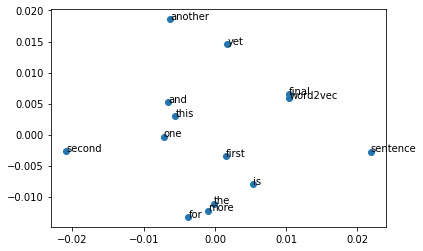

In [19]:
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()
